# Exercise 7
## Modelling Solution-Mineral Chemistry
*** 

### Questions
How can I predict the chemical properties of a complex fluid, and how minerals will interact with it? 

### Objectives
<div class=obj>
<ol>
    <li>Meet PHREEQC</li>
    <li>Install PHREEQC</li>
    <li>Run PHREEQC to model a simple solution</li>
    <li>Learn how to manipulate PHREEQC to simulate your own systems</li>
</ol>
    
<ul>
Revise:
    <li>Installing a package;</li>
    <li>Manipulating text;</li>
    <li>Defining Functions;</li>
    <li>Loops;</li>
    <li>Data parseing.</li>
</ul>
</div>

### Independent coding
Simulate the evaporation of seawater.

## 7.1 Installing PhreeQC
***

PHREEQC is a piece of software for modelling ion activities and mineral stability in solutions. It is the gold-standard tool for doing these types of calculations and is incredibly powerful... but it's also a bit of a pig to install, and has a steep learning curve!

Let's start by getting it installed...

1. Go to the [PHREEQC website](https://www.usgs.gov/software/phreeqc-version-3).
2. Scroll down to the `iPhreeQC Modules` section, and download the appropriate version for your operating system. Save this somewhere sensible.
3. Unpack the package you've just download, and follow ths instructions in the 'Basic Installation' section of the `INSTALL` file.

## 7.2 Install phreeqpy
***

`phreeqpy` is a python module for interacting with phreeqc.

1. In a terminal window (or Anaconda Prompt), ensure you are in the correct python environment and run: 
    >>> pip install phreeqpy
2. Find more information on the [phreeqpy website](https://www.phreeqpy.com/)

## 7.3 Model a simple solution
***

In this section, we'll import everything you need to run phreeqc, simulate a simple solution, and parse the outputs.

Solutions are described using a special format developed for phreeqc, which you can [find details of here](https://wwwbrr.cr.usgs.gov/projects/GWC_coupled/phreeqc/html/final-29.html).

In [ ]:
import pandas as pd
import phreeqpy.iphreeqc.phreeqc_dll as phreeqc_mod  # if you're using DLL mode (Linux / MacOS / Windows)
# import phreeqpy.iphreeqc.phreeqc_com as phreeqc_mod  # if you're using COM mode (Windows only)

In [37]:
iphreeqc_file = '/usr/local/lib/libiphreeqc.so'  # Location of the iPhreeqc shared library on Linux
# iphreeqc_file = '/usr/local/lib/libiphreeqc.dylib'  # Location of the iPhreeqc shared library on MacOS
# iphreeqc_file = 'C:\\path\\to\\iphreeqc.dll'  # Location of the iPhreeqc shared library on Windows

phreeqc = phreeqc_mod.IPhreeqc(iphreeqc_file)  # Location of the iPhreeqc shared library on Linux

database_file = "/home/oscar/phreeqc/iphreeqc-3.8.6-17100/database/phreeqc.dat"  # Location of the PHREEQC database file on Linux

phreeqc.load_database(database_file)

input_str ="""
SOLUTION 1  # this section describes the solution you want to model
    pH      8.5   # the pH of your solution on the MacInness scale (identical to the NBS scale in an ideal solution)
    pe      4.0   # the electron activity (pe) of your solution
    temp    25.0  # temperature in degrees Celsius
    units   mmol/kgs  # concentration units: millimoles per kilogram of solution
    density 1.0   # density of the solution in g/cm3
    Ca      10.0  # concentration of calcium in mmol/kgs
    Mg      5.0   # concentration of magnesium in mmol/kgs
    Na      20.0  # concentration of sodium in mmol/kgs
    K       5.0   # concentration of potassium in mmol/kgs
    Cl      30.0  # concentration of chloride in mmol/kgs
    SO4     15.0  # concentration of sulfate in mmol/kgs
    C(4)    2.0   # concentration of total inorganic carbon in mmol/kgs
SELECTED_OUTPUT  # what output you want from the simulation
    -pH      true  # include pH in the output
    -pe      true  # include pe in the output
    -totals  Ca Mg Na K Cl S C  # include total concentrations of these elements
    -molalities Ca+2 Mg+2 Na+ K+ Cl- SO4-2 HCO3- CO3-2  # include molalities of these ions
    -activities Ca+2 Mg+2 Na+ K+ Cl- SO4-2 HCO3- CO3-2  # include activities of these ions
    -si      calcite  # include saturation index of calcite
END
"""

# run the simulation
phreeqc.run_string(input_str)


Now we've run the simulation, we need to get the output.

In [38]:
out = phreeqc.get_selected_output_array()
solution = pd.DataFrame(out[1:], columns=out[0])

solution

,sim,state,soln,dist_x,time,step,pH,pe,Ca(mol/kgw),Mg(mol/kgw),...,m_CO3-2(mol/kgw),la_Ca+2,la_Mg+2,la_Na+,la_K+,la_Cl-,la_SO4-2,la_HCO3-,la_CO3-2,si_calcite
0,1,i_soln,1,-99.0,-99.0,-99,8.5,4.0,0.010024,0.005012,...,0.000045,-2.349363,-2.638914,-1.786477,-2.395568,-1.616319,-999.999,-2.865548,-4.694402,1.4362


In [39]:
# let's see all the columns in the output
solution.columns.tolist()

['sim',
 'state',
 'soln',
 'dist_x',
 'time',
 'step',
 'pH',
 'pe',
 'Ca(mol/kgw)',
 'Mg(mol/kgw)',
 'Na(mol/kgw)',
 'K(mol/kgw)',
 'Cl(mol/kgw)',
 'S(mol/kgw)',
 'C(mol/kgw)',
 'm_Ca+2(mol/kgw)',
 'm_Mg+2(mol/kgw)',
 'm_Na+(mol/kgw)',
 'm_K+(mol/kgw)',
 'm_Cl-(mol/kgw)',
 'm_SO4-2(mol/kgw)',
 'm_HCO3-(mol/kgw)',
 'm_CO3-2(mol/kgw)',
 'la_Ca+2',
 'la_Mg+2',
 'la_Na+',
 'la_K+',
 'la_Cl-',
 'la_SO4-2',
 'la_HCO3-',
 'la_CO3-2',
 'si_calcite']

The columns here contain total concentrations of specific elements (`X(mol/kgw)`), molalities of specific ions (`m_X(mol/kgw)`), activities of specific ions as log10(activity) (`la_X+`) and saturation indices of specific minerals (`si_X`) which are log10(IAP/Ksp).

If you scroll across to the far right of the dataframe, you'll see that the saturation index of calcite is 1.4362, so calcite is likely to precipitate from this solution!

## 7.4 Modelling multiple solutions
***

What if you want to simulate solutions across a range of different compositions? It would get cumbersome to enter each composition manually.

An input file can contain multiple solutions, which will all be calculated simultaneously. We can create this input file programmatically by writing a function and using a loop.

In [ ]:
def make_solution(n, Ca=0):
    """Make a solution block with a specified calcium concentration."""
    return f"""
    SOLUTION {n:.0f}  # this section describes the solution you want to model
    pH      8.5   # the pH of your solution on the MacInness scale (identical to the NBS scale in an ideal solution)
    pe      4.0   # the electron activity (pe) of your solution
    temp    25.0  # temperature in degrees Celsius
    units   mmol/kgs  # concentration units: millimoles per kilogram of solution
    density 1.0   # density of the solution in g/cm3
    Ca      {Ca:.3e}  # concentration of calcium in mmol/kgs
    Mg      5.0   # concentration of magnesium in mmol/kgs
    Na      20.0  # concentration of sodium in mmol/kgs
    K       5.0   # concentration of potassium in mmol/kgs
    Cl      30.0  # concentration of chloride in mmol/kgs
    SO4     15.0  # concentration of sulfate in mmol/kgs
    C(4)    2.0   # concentration of total inorganic carbon in mmol/kgs
    """

def make_input(ca_values):
    """Make an input string containing multiple solutions with different Ca concentrations and a corresponding output block."""
    input_str = ""
    for i, ca in enumerate(ca_values):
        input_str += make_solution(i+1, Ca=ca)
    input_str += """SELECTED_OUTPUT  # what output you want from the simulation
    -pH      true  # include pH in the output
    -pe      true  # include pe in the output
    -totals  Ca Mg Na K Cl S C  # include total concentrations of these elements
    -molalities Ca+2 Mg+2 Na+ K+ Cl-2 SO4-2 HCO3- CO3-2  # include molalities of these ions
    -activities Ca+2 Mg+2 Na+ K+ Cl-2 SO4-2 HCO3- CO3-2  # include activities of these ions
    -si      calcite  # include saturation index of calcite
    END
    """

    return input_str

In [55]:
import numpy as np
import matplotlib.pyplot as plt

In [79]:
# use your new functions to make the input string
input_str = make_input(ca_values=np.linspace(0.1, 30, 50))

# run the input string
phreeqc.run_string(input_str)

# parse the output
out = phreeqc.get_selected_output_array()
solution = pd.DataFrame(out[1:], columns=out[0])

# view the outout
solution

,sim,state,soln,dist_x,time,step,pH,pe,Ca(mol/kgw),Mg(mol/kgw),...,m_CO3-2(mol/kgw),la_Ca+2,la_Mg+2,la_Na+,la_K+,la_Cl-2,la_SO4-2,la_HCO3-,la_CO3-2,si_calcite
0,1,i_soln,1,-99.0,-99.0,-99,8.5,4.0,0.000100,0.005010,...,0.000045,-4.305407,-2.597959,-1.774716,-2.381549,-999.999,-999.999,-2.815899,-4.644754,-0.470196
1,1,i_soln,2,-99.0,-99.0,-99,8.5,4.0,0.000712,0.005010,...,0.000045,-3.457178,-2.600917,-1.775565,-2.382540,-999.999,-999.999,-2.819465,-4.648319,0.374467
2,1,i_soln,3,-99.0,-99.0,-99,8.5,4.0,0.001323,0.005010,...,0.000045,-3.191065,-2.603805,-1.776393,-2.383511,-999.999,-999.999,-2.822947,-4.651801,0.637099
3,1,i_soln,4,-99.0,-99.0,-99,8.5,4.0,0.001935,0.005010,...,0.000045,-3.028875,-2.606633,-1.777205,-2.384464,-999.999,-999.999,-2.826358,-4.655213,0.795877
4,1,i_soln,5,-99.0,-99.0,-99,8.5,4.0,0.002546,0.005010,...,0.000045,-2.912603,-2.609393,-1.777997,-2.385397,-999.999,-999.999,-2.829690,-4.658545,0.908817
5,1,i_soln,6,-99.0,-99.0,-99,8.5,4.0,0.003158,0.005010,...,0.000045,-2.822047,-2.612092,-1.778772,-2.386313,-999.999,-999.999,-2.832952,-4.661806,0.996111
6,1,i_soln,7,-99.0,-99.0,-99,8.5,4.0,0.003769,0.005011,...,0.000045,-2.748022,-2.614734,-1.779530,-2.387212,-999.999,-999.999,-2.836146,-4.665001,1.066942
7,1,i_soln,8,-99.0,-99.0,-99,8.5,4.0,0.004380,0.005011,...,0.000045,-2.685518,-2.617321,-1.780273,-2.388094,-999.999,-999.999,-2.839277,-4.668131,1.126316
8,1,i_soln,9,-99.0,-99.0,-99,8.5,4.0,0.004993,0.005011,...,0.000045,-2.631418,-2.619858,-1.781002,-2.388962,-999.999,-999.999,-2.842350,-4.671204,1.177343
9,1,i_soln,10,-99.0,-99.0,-99,8.5,4.0,0.005604,0.005011,...,0.000045,-2.583921,-2.622340,-1.781715,-2.389814,-999.999,-999.999,-2.845359,-4.674214,1.221831


Text(0, 0.5, 'Calcite Saturation Index')

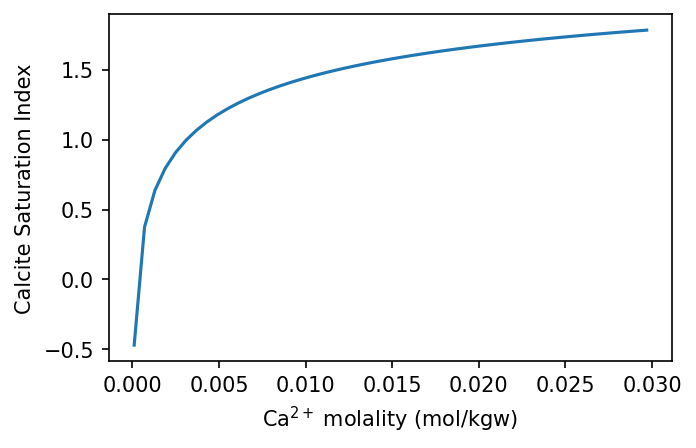

In [80]:
# view the change in calcite saturation index with Ca+2 molality
plt.plot(solution['m_Ca+2(mol/kgw)'], solution['si_calcite'])
plt.xlabel('Ca$^{2+}$ molality (mol/kgw)')
plt.ylabel('Calcite Saturation Index')

## 7.5 Modelling Equilibration
***

So far, we've just modelled the *state* of a solution. It's also possible to let minerals react with the fluid until it reaches an equilibrium state.

We do this using an [EQUILIBRIUM_PHASES](https://wwwbrr.cr.usgs.gov/projects/GWC_coupled/phreeqc/html/final-38.html) block

In [81]:
input_str ="""
SOLUTION 1  # this section describes the solution you want to model
    pH      8.5  
    pe      4.0  
    temp    25.0 
    units   mmol/kgs
    density 1.0
    Ca      10.0
    Mg      5.0
    Na      20.0
    K       5.0
    Cl      30.0
    SO4     15.0
    C(4)    2.0
EQUILIBRIUM_PHASES 1  # this section describes the phases that you want to equilibrate with the solution
    Calcite 0.0 10  # mineral name, and the saturation index you want it to equilibrate to (0.0 means the mineral will precipitate or dissolve until the solution reaches the saturation point), and the initial amount available for reaction in moles
    CO2(g) -3.5 10 # gas phase name, the log10 of the fugacity in atmsphere, negative values indicate low fugacity, and the initial amount available for reaction in moles
SELECTED_OUTPUT
    -pH      true
    -pe      true
    -totals  Ca Mg Na K Cl S C
    -molalities Ca+2 Mg+2 Na+ K+ Cl- SO4-2 HCO3- CO3-2
    -activities Ca+2 Mg+2 Na+ K+ Cl- SO4-2 HCO3- CO3-2
    -si      calcite CO2(g)
END
"""

# run the simulation
phreeqc.run_string(input_str)

# parse the output
out = phreeqc.get_selected_output_array()
solution = pd.DataFrame(out[1:], columns=out[0])

# view the outout
solution

,sim,state,soln,dist_x,time,step,pH,pe,Ca(mol/kgw),Mg(mol/kgw),...,la_Ca+2,la_Mg+2,la_Na+,la_K+,la_Cl-,la_SO4-2,la_HCO3-,la_CO3-2,si_calcite,si_CO2(g)
0,1,i_soln,1,-99.0,-99.0,-99,8.500000,4.000000,0.010024,0.005012,...,-2.349363,-2.638914,-1.786477,-2.395568,-1.616319,-999.999,-2.865548,-4.694402,1.4362,-3.544986
1,1,react,1,-99.0,0.0,1,7.774683,10.271275,0.009096,0.005012,...,-2.379930,-2.627880,-1.785028,-2.394037,-1.614983,-999.999,-3.545863,-6.100035,0.0000,-3.500001


# Independent coding
***

Simulate the change in solution composition, ion activity and mineral precipitation as you evaporate seawater. You might find [this example](https://wwwbrr.cr.usgs.gov/projects/GWC_coupled/phreeqc.v1/html/phqc_55.htm), [this post](https://phreeqcusers.org/index.php?topic=59.0) and [this post](https://phreeqcusers.org/index.php?topic=1914.0) on the user forum useful for getting started.

In [83]:
# heres seawater composition to get you started
seawater = """
SOLUTION 1  Black Sea water
    units   mg/L
    density 1.014
    pH      8.0     # estimated
    Ca      233
    Mg      679
    Na      5820
    K       193
    S(6)    1460
    Cl      10340
    Br      35
    C       1       CO2(g) -3.5
"""